<a href="https://colab.research.google.com/github/SoungbinC/CMPE_255/blob/Assignment8/Dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#PCA

In [2]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [7]:
explained_variance

array([0.36884109, 0.19318394])

In [8]:
principalDF=pd.DataFrame(data = X_train, columns = ['principal component 1', 'principal component 2'])
principalDF.head()

,principal component 1,principal component 2
0,-2.178845,-1.072185
1,-1.808192,1.578223
2,1.098295,2.221243
3,-2.555847,-1.662104
4,1.856981,0.241573


In [9]:

# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [10]:

# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

<ipython-input-12-b641f8ec0743>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


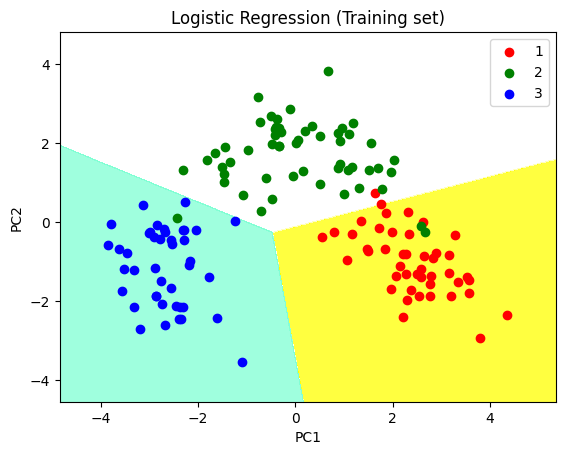

In [12]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# show scatter plot
plt.show()

<ipython-input-13-f1151c61ff86>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


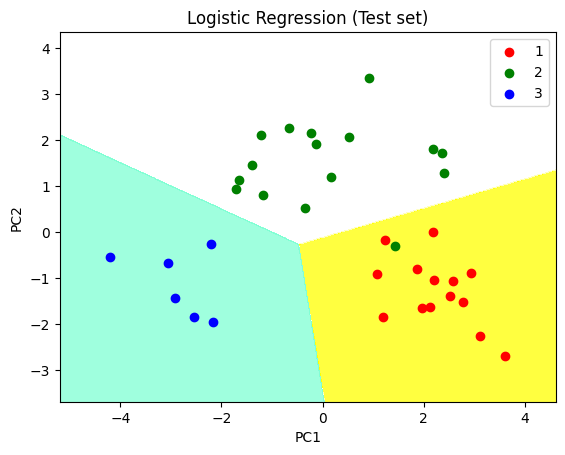

In [13]:

# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# show scatter plot
plt.show()

#SVD

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_digits

In [15]:
digits = load_digits()
X, y = digits.data, digits.target

svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X)

<ipython-input-16-f16bfc7ae435>:2: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y, cmap='jet', edgecolor='k', s=150, marker="x")


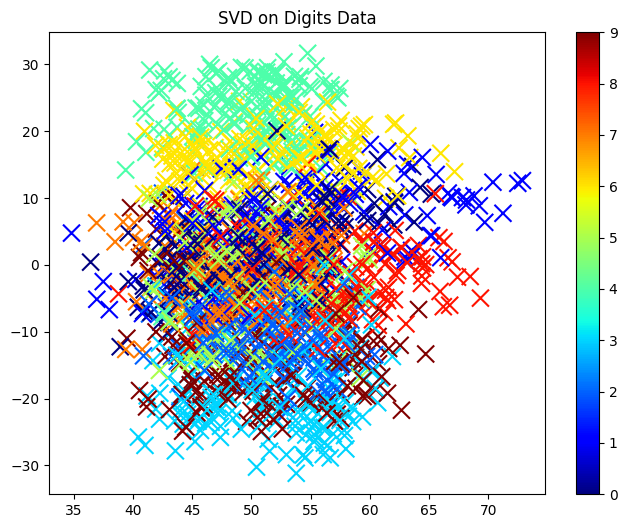

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y, cmap='jet', edgecolor='k', s=150, marker="x")
plt.colorbar()
plt.title('SVD on Digits Data')
plt.show()

#MDS

Original Dimension of X :  (100, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Dimension of X after MDS :  (100, 2)


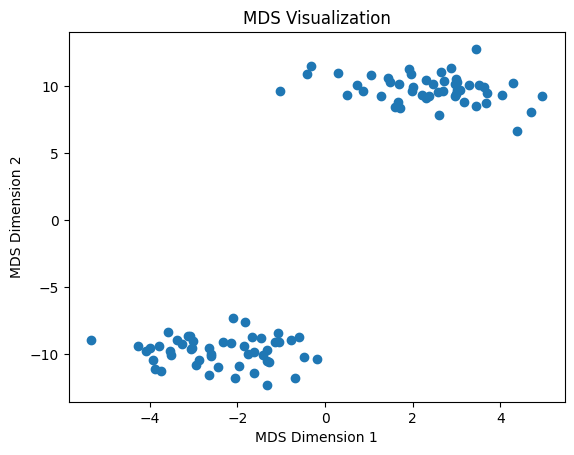

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.manifold import MDS

# Generate a sample dataset (you can replace this with your own data)
X, _ = make_blobs(n_samples=100, n_features=3, centers=2, random_state=42)

print('Original Dimension of X : ', X.shape)
# Perform MDS to reduce the dimensionality to 2D

mds = MDS(n_components=2, random_state=42)
X_2d = mds.fit_transform(X)

print('Dimension of X after MDS : ', X_2d.shape)

# Plot the results
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.title("MDS Visualization")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.show()

#ISOmaps

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


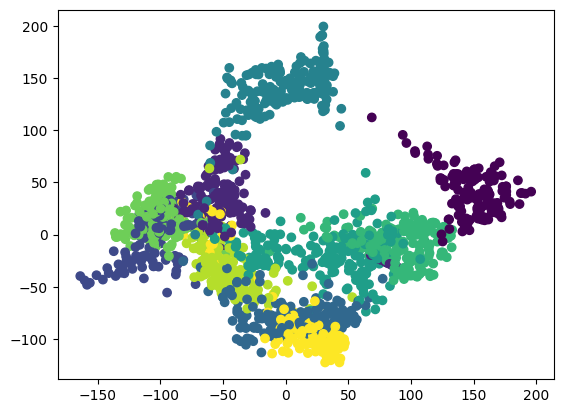

In [18]:

from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
y = digits.target

isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)

plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y)
plt.show()

#LLE

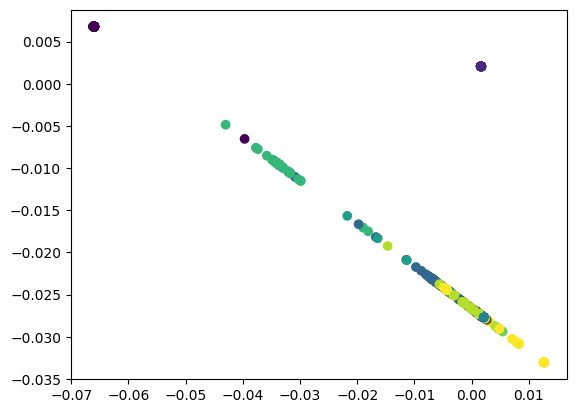

In [19]:
from sklearn.datasets import load_digits
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
y = digits.target

lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_lle = lle.fit_transform(X)

plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y)
plt.show()

#t-sne


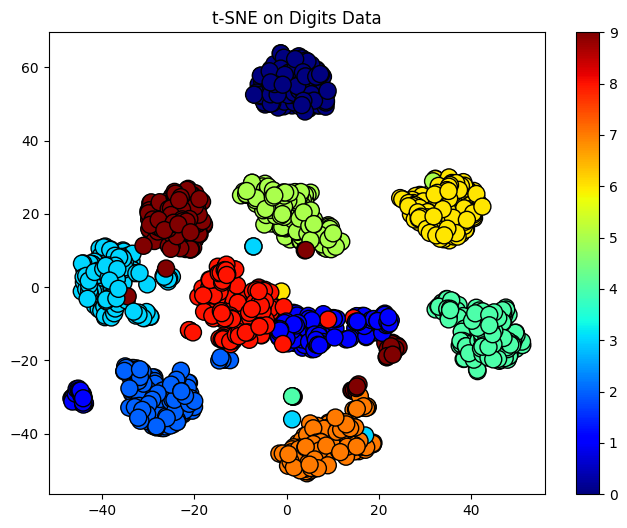

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

# Load data
digits = load_digits()
X, y = digits.data, digits.target

# Instantiate t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

# Create a scatter plot of the two-dimensional data
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='jet', edgecolor='k', s=150)
plt.colorbar()
plt.title('t-SNE on Digits Data')
plt.show()

#UMAP

In [21]:
tps = pd.read_csv('/content/drive/MyDrive/train.csv')
X, y = tps.drop("target", axis=1), tps[["target"]].values.flatten()

X.head().sample(10, axis=1)

,feature_62,feature_44,feature_60,feature_9,feature_69,feature_59,feature_8,feature_46,feature_24,feature_51
0,1,0,0,0,0,0,7,0,0,0
1,0,0,0,0,0,0,0,1,0,0
2,2,0,3,0,0,1,0,0,0,0
3,7,1,2,1,2,0,0,0,0,10
4,0,0,0,0,0,0,0,0,0,0


In [22]:
!pip3 install umap-learn

In [24]:
import umap
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline, make_pipeline
# Scale
pipe = make_pipeline(PowerTransformer())
X = pipe.fit_transform(X.copy())

# Encode the target to numeric
y_encoded = pd.factorize(y)[0]

In [27]:
manifold = umap.UMAP().fit(X, y_encoded)

In [29]:
!pip install umap-learn[plot]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 37.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


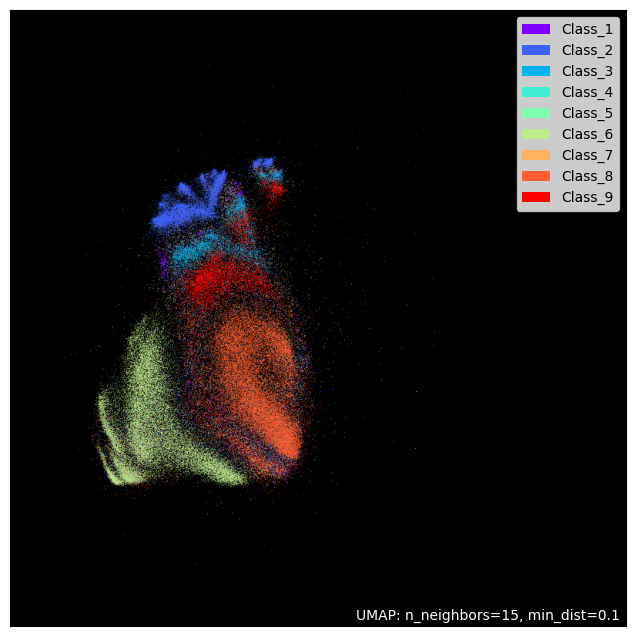

In [30]:
import umap.plot

umap.plot.points(manifold, labels=y, theme="fire");